<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/NetflixStockForcasting16Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Stock Forcasting
The aim of this project is to use the ARIMA model to predict the Stock Prices as well as
forecast the stock price values for the next 30 days.

Drive Link : https://drive.google.com/drive/folders/14ZMhPVznVaxFK3kxgGoDc-fIDCkGq3ER?usp=sharing

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NFLX.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Columns
* Date → The day this stock information was recorded.
* Open → The price of Netflix stock when trading started that day.
* High → The highest price the stock reached that day.
* Low → The lowest price the stock dropped to that day.
* Close → The price of Netflix stock when trading ended that day.
* Adj Close → A slightly adjusted closing price that accounts for things like stock splits or dividends.
* Volume → The total number of Netflix shares that were bought and sold that day.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# fix the date type for date column
df.Date = pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [ ]:
# Let's drop the unecssary colms
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
df.set_index(['Date'],inplace = True)
df.head()

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


In [ ]:
df.shape

(1009, 1)

In [ ]:
df.duplicated().sum()

21

In [ ]:
df.isnull().sum()

,0
Adj Close,0


# Trend and Seasonality
Let's check whether the data is stationary or not

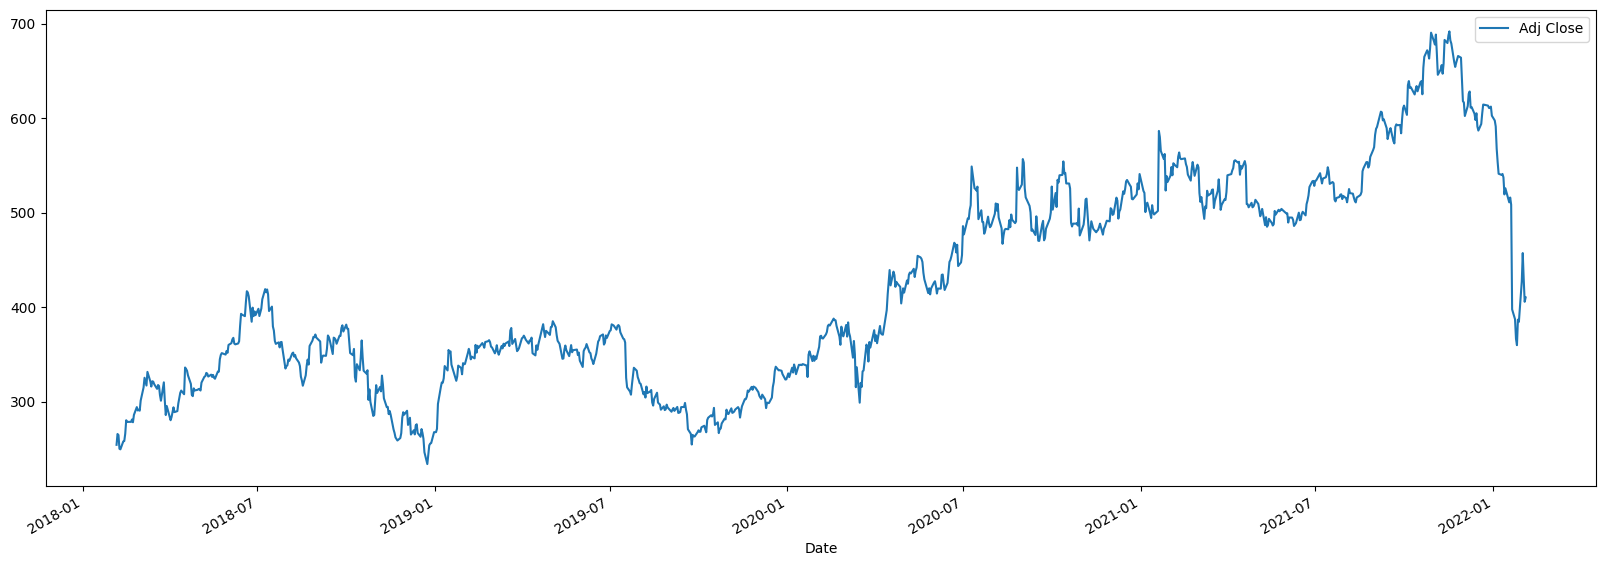

In [ ]:
df.plot(figsize=(20,7))
plt.show()

Figure(640x480)


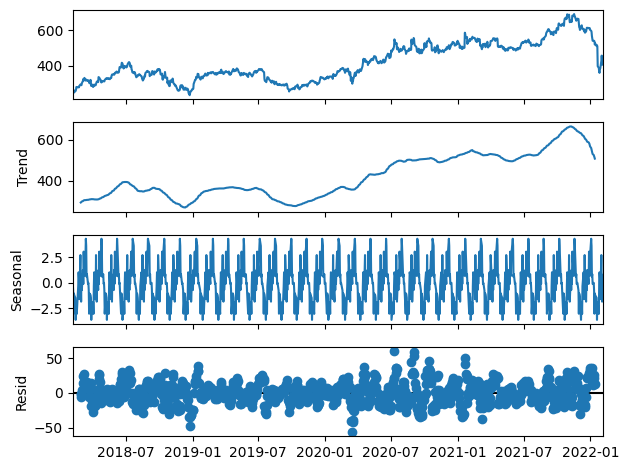

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df,period = 30)
print(result.plot())

# ADFuller Test to find whether the data is stationary or not?

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
result[1]

0.3742289256820759

p = 0.3742289256820759 (P value)
* if p is less than 0.05 --> Data is stationary
* if p is greater than 0.05 --> Data is not stationary

In [ ]:
if result[1] >=0.05:
  print('Data is not stationary')
else:
  print('Data is stationary')

Data is not stationary


# SHIFT
our data is having trends and seasonality
* .shift(1) - it is a function that moves the data down by one row
* Each row will be having previous day's value
* if we substract (old - new), we will get the day to day changes instead of using entire value



---
* Before shift: The stock was keep increasing
* After shift : We will a list of daily changes value (which is more stable)-----> Stationary


In [ ]:
new_data = df - df.shift(1) # By removing trend and seasonality we will be achiving stationarity
new_data = new_data.dropna()

In [ ]:
new_data.head()

,Adj Close
Date,
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005
2018-02-12,8.480011


Figure(640x480)


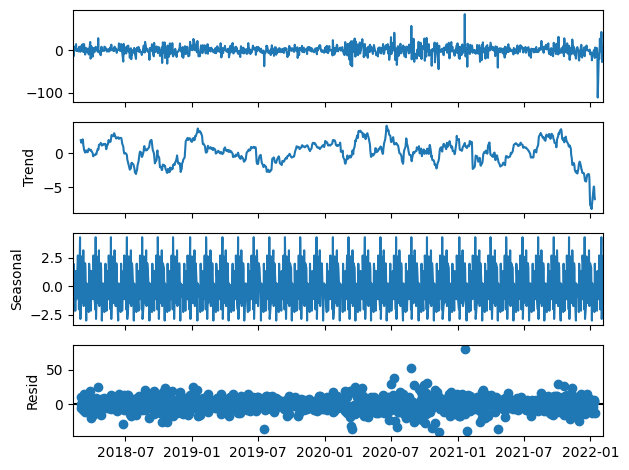

In [ ]:
result = seasonal_decompose(new_data,period = 30)
print(result.plot())

In [ ]:
result = adfuller(new_data)
result[1]
# 1.5304022754298515 * 10^-26

1.5304022754298515e-26

In [ ]:
if result[1] >=0.05:
  print('Data is not stationary')
else:
  print('Data is stationary')

Data is stationary


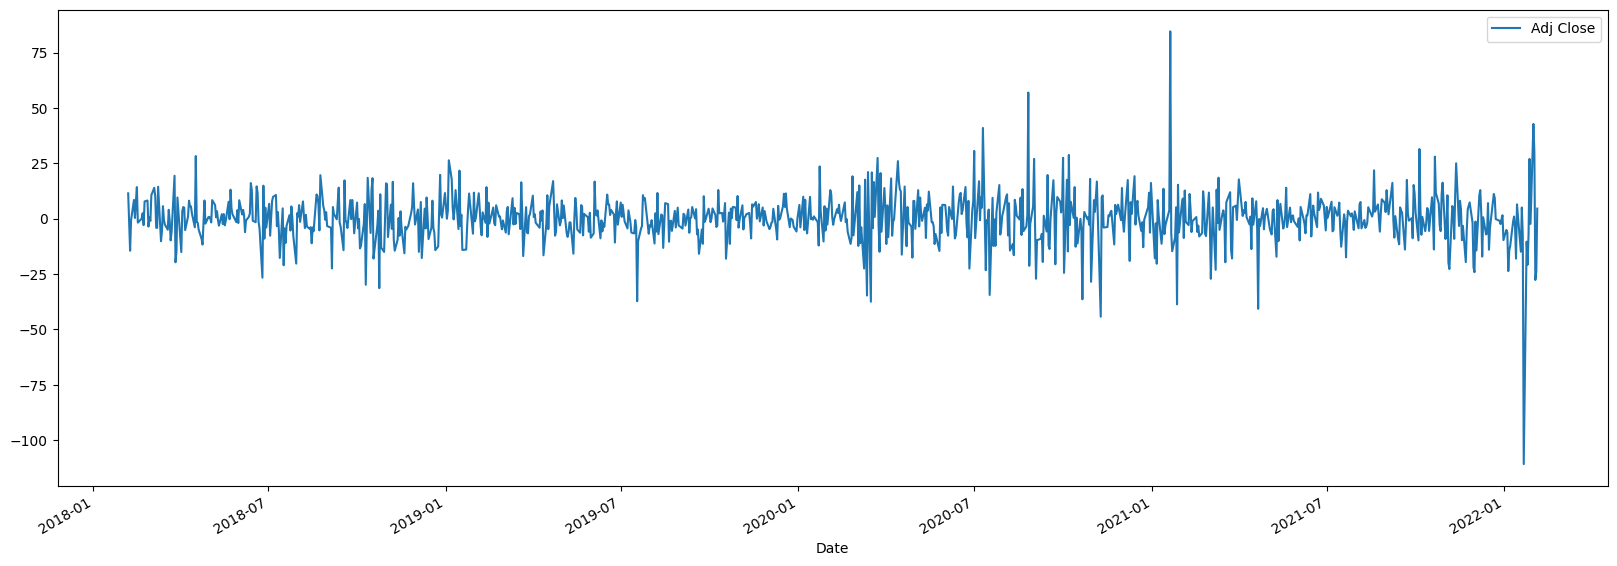

In [ ]:
new_data.plot(figsize=(20,7))
plt.show()

# Model building

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

**Use itertools to find the optimal values of pdq**

In [ ]:
import itertools
trainsize = int(len(new_data)*0.8)# selecting 80% of full data for training
trainsize

806

In [ ]:
(1008 * 80)/100

806.4

In [ ]:
train = df['Adj Close'][: trainsize]
test = df['Adj Close'][trainsize:]

In [ ]:
train

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2021-04-13,553.729980
2021-04-14,540.020020
2021-04-15,549.219971


In [ ]:
test

,Adj Close
Date,
2021-04-20,549.570007
2021-04-21,508.899994
2021-04-22,508.779999
2021-04-23,505.549988
2021-04-26,510.299988
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
p = range(0,7)
d = range(1,2)
q = range(0,7)

# create the combination of diff data value of pdq
pdq = list(itertools.product(p,d,q))

In [ ]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6)]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = []
order1 = []

for i in pdq:
  model = ARIMA(train,order = i)
  model_fit = model.fit()
  pred = model_fit.predict(start =len(train),end = len(train)+ len(test)-1)
  error = np.sqrt(mean_squared_error(test,pred)) # Let's compare actual values with predicted value

  order1.append(i)
  rmse.append(error)

result = pd.DataFrame(index=order1,data = rmse,columns=['RMSE Values'])
result

,RMSE Values
"(0, 1, 0)",70.279051
"(0, 1, 1)",70.325830
"(0, 1, 2)",70.318572
"(0, 1, 3)",70.330479
"(0, 1, 4)",70.321461
"(0, 1, 5)",70.365610
"(0, 1, 6)",70.380547
"(1, 1, 0)",70.323095
"(1, 1, 1)",70.326899
"(1, 1, 2)",70.334866


In [ ]:
result.sort_values(by='RMSE Values',ascending=True)

,RMSE Values
"(6, 1, 6)",70.247334
"(0, 1, 0)",70.279051
"(5, 1, 4)",70.294167
"(6, 1, 5)",70.299654
"(5, 1, 5)",70.302101
"(6, 1, 4)",70.309007
"(4, 1, 6)",70.318478
"(0, 1, 2)",70.318572
"(2, 1, 0)",70.319266
"(0, 1, 4)",70.321461


# Need to recheck..

In [ ]:
start = len(train)
start

806

In [ ]:
end = len(train) + len(test)
end

1009

In [ ]:
model1 = ARIMA(df["Adj Close"], order =(6,1,6))
result1 = model1.fit()
result1.summary()  # It will print the summary of your ARIMA model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.361
Date:                Sun, 16 Feb 2025   AIC                           7702.723
Time:                        14:05:39   BIC                           7766.627
Sample:                             0   HQIC                          7727.002
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2226      0.065      3.445      0.001       0.096       0.349
ar.L2          0.6265      0.062     10.131      0.000       0.505       0.748
ar.L3         -1.1327      0.069    -16.518      0.000      -1.267      -0.998
ar.L4          0.5390      0.062      8.658      0.000       0.417       0.661
ar.L5          0.2455      0.056      4.348      0.000       0.135       0.356
ar.L6         -0.8749      0.065    -13.535      0.000      -1.002      -0.748
ma.L1         -0.2625      0.074     -3.540      0.000      -0.408      -0.117
ma.L2         -0.5879      0.068     -8.668      0.000      -0.721      -0.455
ma.L3          1.1596      0.071     16.444      0.000       1.021       1.298
ma.L4         -0.5766      0.065     -8.882      0.000      -0.704      -0.449
ma.L5         -0.2654      0.065     -4.060      0.000      -0.394      -0.137
ma.L6          0.8397      0.073     11.528      0.000       0.697       0.982
sigma2       120.4552      2.382     50.562      0.000     115.786     125.125
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9330.40
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Lets directly add a new column to our data to show predicted values
df["Prediction_by_ARIMA"] = result1.predict( start = 1 , end = 1008)

In [ ]:
df

,Adj Close,Prediction_by_ARIMA
Date,,
2018-02-05,254.259995,NaN
2018-02-06,265.720001,254.258723
2018-02-07,264.559998,265.259372
2018-02-08,250.100006,264.964598
2018-02-09,249.470001,250.541367
...,...,...
2022-01-31,427.140015,391.656473
2022-02-01,457.130005,431.383101
2022-02-02,429.480011,455.196725


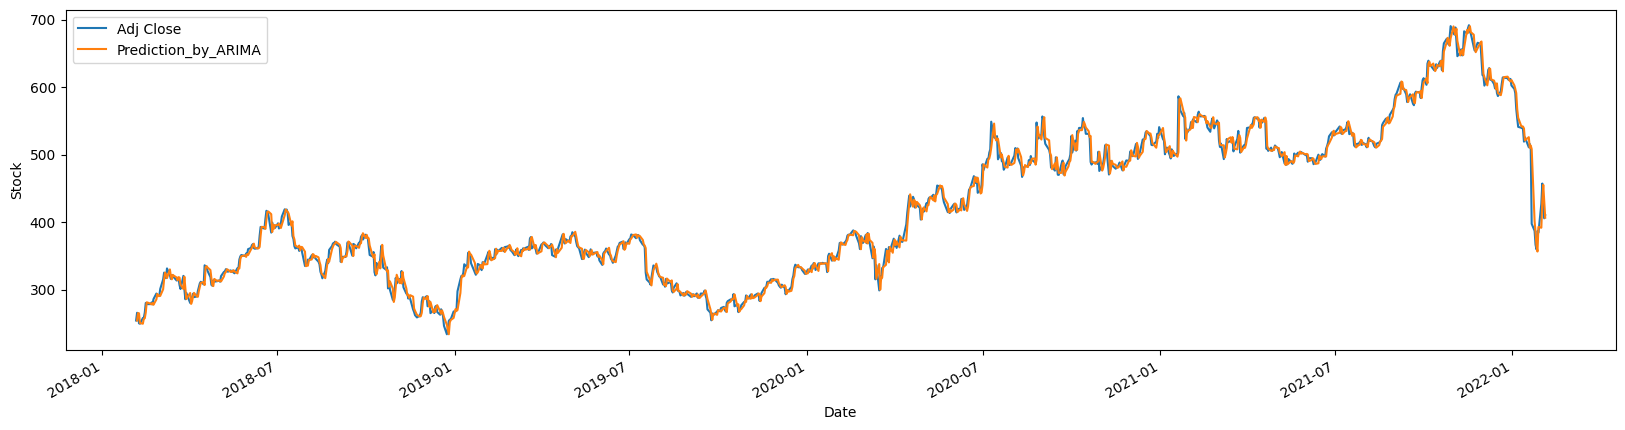

In [ ]:
# Lets draw a plot to show real value and predicted value
df[["Adj Close" , "Prediction_by_ARIMA"]].plot(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Stock")
plt.show()

In [ ]:
# Use the model for future prediction
forecast = result1.get_forecast(steps=30)

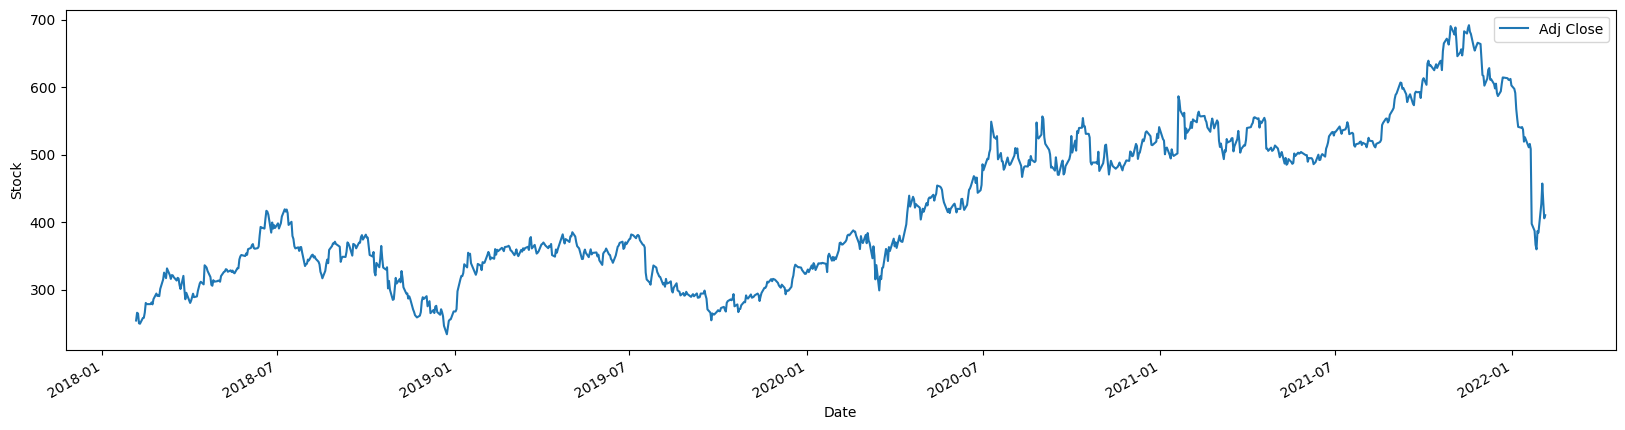

In [ ]:
df.plot(figsize = (20,5))
plt.xlabel('Date')
plt.ylabel('Stock')
plt.show()

In [ ]:
# Extract the forecasast value for upcoming 30 days after 4th feb 2022
forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1009,408.603822
1010,400.179374
1011,393.166354
1012,391.768230
1013,396.047945
1014,398.195215
1015,398.460530
1016,399.912785
1017,406.069384
1018,411.480072


In [ ]:
forecast = result1.get_forecast(steps=365) # For an year
forecast_value = forecast.predicted_mean
forecast_value

,predicted_mean
1009,408.603822
1010,400.179374
1011,393.166354
1012,391.768230
1013,396.047945
...,...
1369,402.316463
1370,402.313815
1371,402.317588
1372,402.314904


# Let's Try Sarimax

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMAX Model (Similar to ARIMA but with Seasonal Component)
model2 = SARIMAX(df["Adj Close"], order=(6, 1, 6), seasonal_order=(1, 1, 1, 30))  # (p,d,q) & (P,D,Q,S)
result2 = model2.fit()
print(result2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 1009
Model:             SARIMAX(6, 1, 6)x(1, 1, [1], 30)   Log Likelihood               -3777.942
Date:                              Sun, 16 Feb 2025   AIC                           7585.884
Time:                                      14:11:52   BIC                           7659.167
Sample:                                           0   HQIC                          7613.767
                                             - 1009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4149      0.326      1.274      0.203      -0.223       1.053
ar.L2          0.62

In [ ]:
# Lets directly add a new column to our data to show predicted values
df["Prediction_by_SARIMAx"] = result2.predict( start=len(train),end= len(train) + len(test) -1)

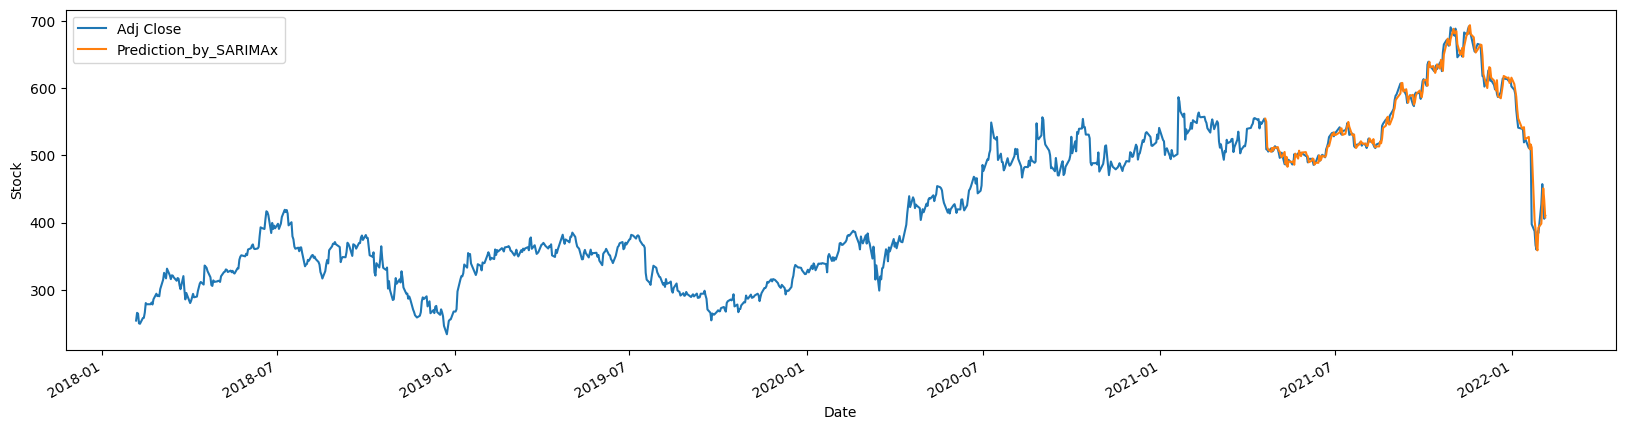

In [ ]:
df[["Adj Close" , "Prediction_by_SARIMAx"]].plot(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Stock")
plt.show()

In [ ]:
future = result2.forecast(steps=30)
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]  # Next 30 days(Solved the issue of getting result in past)

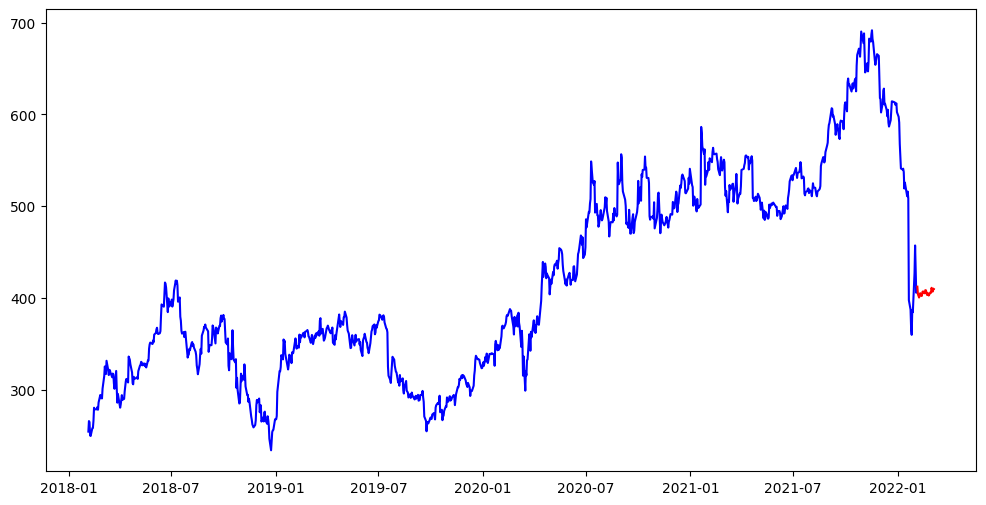

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Adj Close"], label="Actual Prices", color="blue")
plt.plot(future_dates, future, label="Forecasted Prices", color="red")
plt.show()


# Prophet

In [ ]:
pip install prophet


In [ ]:
from prophet import Prophet
df = pd.read_csv("NFLX.csv")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Adj Close']].rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [ ]:
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

In [ ]:
model = Prophet()
model.fit(train_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rwipx3o/2q2nf82s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rwipx3o/bcua2lam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81338', 'data', 'file=/tmp/tmp9rwipx3o/2q2nf82s.json', 'init=/tmp/tmp9rwipx3o/bcua2lam.json', 'output', 'file=/tmp/tmp9rwipx3o/prophet_modely5t3soem/prophet_model-20250216141316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_test = test_df[['ds']]
forecast_test = model.predict(future_test)

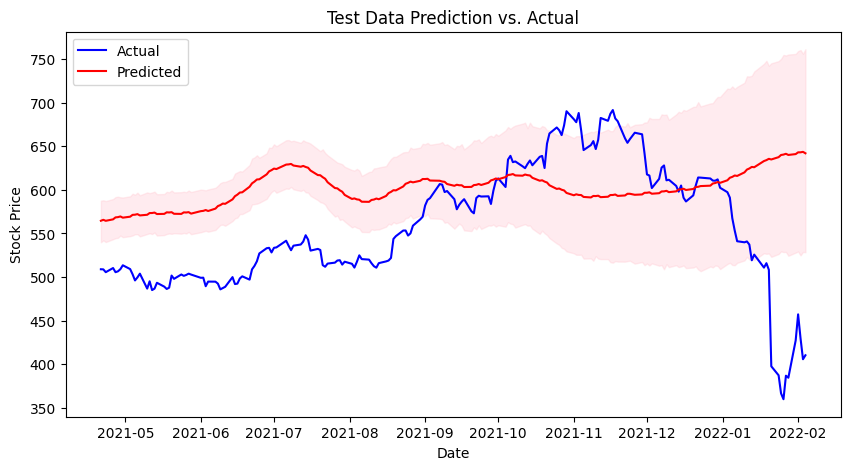

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_df['ds'], test_df['y'], label="Actual", color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label="Predicted", color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Test Data Prediction vs. Actual")
plt.legend()
plt.show()

In [ ]:
# Forecast the next 30 days
future_30_days = model.make_future_dataframe(periods=30)
forecast_30_days = model.predict(future_30_days)

In [ ]:
forecast_after_test = forecast_30_days[forecast_30_days['ds'] > test_df['ds'].max()]

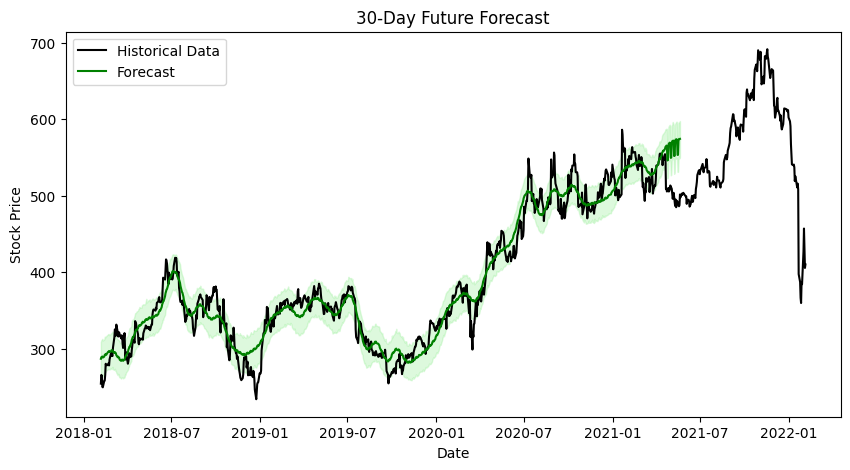

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label="Historical Data", color='black')
plt.plot(forecast_30_days['ds'], forecast_30_days['yhat'], label="Forecast", color='green')
plt.fill_between(forecast_30_days['ds'], forecast_30_days['yhat_lower'], forecast_30_days['yhat_upper'], color='lightgreen', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("30-Day Future Forecast")
plt.legend()
plt.show()


In [ ]:
print(forecast_30_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds        yhat  yhat_lower  yhat_upper
807 2021-04-21  564.585159  541.271070  586.793457
808 2021-04-22  565.656996  542.370828  587.813159
809 2021-04-23  564.527386  539.816220  587.336667
810 2021-04-24  546.158991  522.780570  570.255758
811 2021-04-25  546.740660  524.442444  569.827676
812 2021-04-26  566.190803  543.944951  589.526584
813 2021-04-27  568.440825  545.047784  591.441722
814 2021-04-28  568.740716  546.240553  591.317896
815 2021-04-29  569.522839  547.420116  592.921132
816 2021-04-30  568.141378  544.758108  590.756420
817 2021-05-01  549.555910  526.779312  572.467293
818 2021-05-02  549.951278  527.386103  573.365313
819 2021-05-03  569.241165  546.290878  592.042430
820 2021-05-04  571.351756  547.630061  593.044252
821 2021-05-05  571.527552  548.959691  596.472207
822 2021-05-06  572.195390  549.157564  594.993459
823 2021-05-07  570.704117  546.188604  592.795835
824 2021-05-08  552.008372  528.716540  575.318520
825 2021-05-09  552.288648  531

**Don't worry about phrophet model. This will be discuss in your calss. I just implemented it to see whether the predictions are getting good or no.**

**It gave me some what better result than arima and sarimax (and that also by seprating training and testing data)**


---



### Why we gave all data?
We are building the final model for forecasting future values, not for validation.(Following the question we just need to get the next 30 days forecasting by creating a model that predicts.)
* If our goal is not to evaluate the model’s accuracy on past data, but instead to generate the best possible forecast for future prices, then we use all available data to train ARIMA.

* More historical data → Better learning → More accurate long-term forecast.

# Conclusion
We use all values because we are making the best possible future forecast, not testing accuracy. More data helps ARIMA learn better patterns, leading to more authentic predictions. If we were evaluating the model, we would split the data(IN PROPHET WE DID), but for final forecasting, we train on everything.

# THANK YOU TEAM (SIGNING OFF----ARYAN)